In [219]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

In [220]:
df = pd.read_csv("../data/2022_12_23/apartment_data.csv")
df = df[df["building_year"] < 2023] 
df = df[~df["price"].isna()]
df.head()

,code,created_at,updated_at,price,price_per_m2,slides,seller,town_district_name,town_sub_district_name,address,...,parking_place,nearest_metro_station,nearest_metro_station_distance,layout,neighbors,number_of_beds,term_of_sale,owner,ceiling_height,is_new_build
1,1465891,2019-03-21T21:59:54+03:00,2022-12-23T12:50:25+03:00,99544.0,1418.0,['https://www.youtube.com/watch?v=vOCuCTLTsFQ'...,Хозяин,Центральный район,Лебяжий (Ржавец),Минск Ильянская ул. 16,...,False,NaN,NaN,NaN,NaN,NaN,Чистая продажа,частная,2.75,True
2,2878389,2022-10-12T13:11:13+03:00,2022-12-22T14:19:04+03:00,75400.0,1189.0,['https://www.youtube.com/watch?v=D58zw-fXcx4&...,Хозяин,Октябрьский район,Минск Мир (Minsk World),Минск Белградская ул. 6,...,False,Аэродромная (2023),500.0,свободная планировка,NaN,NaN,Чистая продажа,частная,3.03,True
4,2893900,2022-10-31T16:45:43+03:00,2022-12-23T15:28:36+03:00,145000.0,2385.0,['https://static.realt.by/user/g9/q/site1kmduq...,Агентство,Первомайский район,Макаенка,Минск Макаенка ул. 12 Г,...,True,Московская,700.0,свободная планировка,NaN,NaN,Чистая продажа,частная,2.75,True
5,2912931,2022-11-25T15:16:57+03:00,2022-12-19T16:26:15+03:00,212000.0,1898.0,['https://static.realt.by/user/6x/3/site1lwgc3...,Агентство,Центральный район,"Червякова, Шевченко",Минск Нововиленская ул. 10,...,False,NaN,NaN,улучшенный проект,NaN,NaN,Чистая продажа,частная,2.70,False
7,2884112,2022-10-19T11:14:07+03:00,2022-12-22T09:17:36+03:00,119500.0,1802.0,['https://static.realt.by/user/u0/v/site1jzpzv...,Хозяин,Московский район,"Немига, Короля, Клары Цеткин",Минск Короля ул. 18,...,True,Юбилейная площадь,250.0,брежневка,NaN,NaN,Чистая продажа,частная,NaN,False


In [221]:
df = df[["price", 
"town_district_name", 
"building_year", "area_total", 
"area_living", "area_kitchen", 
"rooms","storeys", "storey",
"toilet", "balcony_type",
"house_type", "floor_type",
"nearest_metro_station_distance",
"ceiling_height"]]

In [222]:
df.head()

,price,town_district_name,building_year,area_total,area_living,area_kitchen,rooms,storeys,storey,toilet,balcony_type,house_type,floor_type,nearest_metro_station_distance,ceiling_height
1,99544.0,Центральный район,2021.0,70.2,61.9,NaN,2,25.0,3.0,Раздельный,лоджия застекленная,Каркасно-блочный,NaN,NaN,2.75
2,75400.0,Октябрьский район,2022.0,63.4,55.0,NaN,3,25.0,25.0,Раздельный,лоджия застекленная,Каркасно-блочный,NaN,500.0,3.03
4,145000.0,Первомайский район,2021.0,60.8,53.5,NaN,3,25.0,22.0,Совмещенный,лоджия застекленная,Каркасно-блочный,ламинированные,700.0,2.75
5,212000.0,Центральный район,2011.0,111.7,76.3,NaN,4,10.0,5.0,2 и более,2 лоджии застекленные,Кирпичный,ламинированные,NaN,2.70
7,119500.0,Московский район,1970.0,66.3,47.8,5.8,3,5.0,2.0,Совмещенный,Лоджия,Кирпичный,паркет,250.0,NaN


In [223]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9422 entries, 1 to 21379
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           9422 non-null   float64
 1   town_district_name              9254 non-null   object 
 2   building_year                   9422 non-null   float64
 3   area_total                      9422 non-null   float64
 4   area_living                     9373 non-null   float64
 5   area_kitchen                    6823 non-null   float64
 6   rooms                           9422 non-null   int64  
 7   storeys                         9410 non-null   float64
 8   storey                          9410 non-null   float64
 9   toilet                          8995 non-null   object 
 10  balcony_type                    9336 non-null   object 
 11  house_type                      9413 non-null   object 
 12  floor_type                      7

# EDA

## Town district name

In [224]:
df["town_district_name"].unique()

array(['Центральный район', 'Октябрьский район', 'Первомайский район',
       'Московский район', 'Фрунзенский район', 'Советский район',
       'Ленинский район', 'Заводской район', nan, 'Партизанский район'],
      dtype=object)

In [225]:
df["town_district_name"] = df["town_district_name"].fillna(df["town_district_name"].mode().iloc[0])

## Building year

In [226]:
df["building_year"].unique()

array([2021., 2022., 2011., 1970., 2001., 2020., 1971., 2012., 1984.,
       2014., 2015., 1958., 1977., 1987., 1975., 2016., 1972., 2013.,
       2019., 1974., 1982., 1963., 1981., 1996., 1962., 2018., 2002.,
       1986., 2008., 1968., 2017.,    0., 2005., 1983., 2007., 1959.,
       1954., 2006., 2010., 2004., 1976., 1965., 1980., 1960., 2003.,
       1964., 1990., 1936., 1961., 1966., 1992., 1978., 1955., 1969.,
       1988., 1967., 1973., 1999., 1994., 1993., 1957., 1953., 2009.,
       1979., 1939., 1991., 1995., 1997., 1985., 1989., 1935., 1956.,
       1998., 2000., 1950., 1917., 1951., 1949., 1947., 1940., 1938.,
       1937., 1946., 1952., 1948., 1928., 1918., 1924., 1945., 1941.])

## Total area

<AxesSubplot: xlabel='area_total', ylabel='Count'>

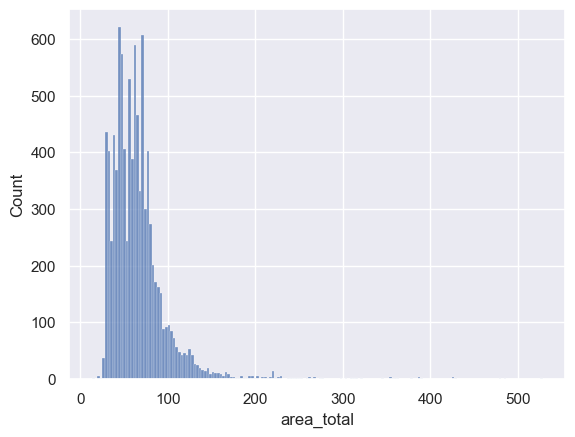

In [227]:
sns.histplot(data=df, x="area_total")

## Living area

<AxesSubplot: xlabel='area_living', ylabel='Count'>

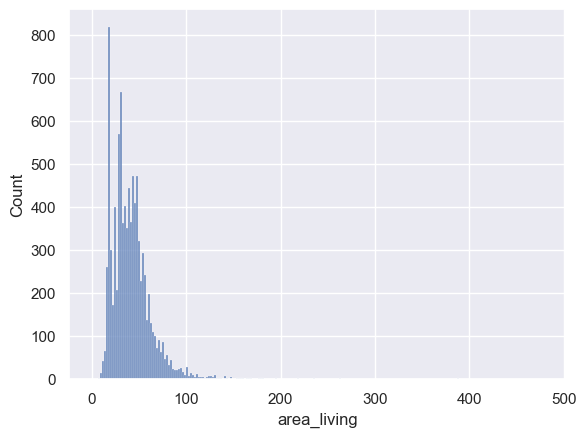

In [228]:
sns.histplot(data=df, x="area_living")

In [229]:
df.assign(
    living_area_percent = df["area_living"]/df["area_total"]
).loc[:, ["living_area_percent", "rooms"]].groupby("rooms").mean()

,living_area_percent
rooms,
1,0.592346
2,0.634244
3,0.652726
4,0.645171
5,0.585579
6,0.476279
7,0.674403
8,0.539676
9,0.570000


## Kitchen area

In [230]:
len(df[df["area_kitchen"].isna()])

2599

<AxesSubplot: xlabel='area_kitchen', ylabel='Count'>

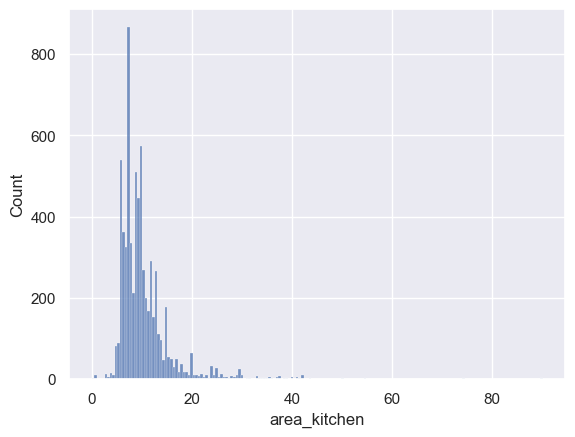

In [231]:
sns.histplot(data=df, x="area_kitchen")

In [232]:
df.assign(
    kitchen_area_percent = df["area_kitchen"]/df["area_total"]
).loc[:, ["kitchen_area_percent", "rooms"]].groupby("rooms").mean()

,kitchen_area_percent
rooms,
1,0.223606
2,0.175024
3,0.142088
4,0.129757
5,0.115814
6,0.143350
7,0.064011
8,0.167013
9,0.072222


## Rooms

In [233]:
df["rooms"].unique()

array([2, 3, 4, 1, 6, 5, 9, 8, 7], dtype=int64)

In [234]:
df["rooms"].value_counts()

3    3299
2    2962
1    1982
4    1025
5     110
6      39
7       3
9       1
8       1
Name: rooms, dtype: int64

<AxesSubplot: xlabel='rooms', ylabel='count'>

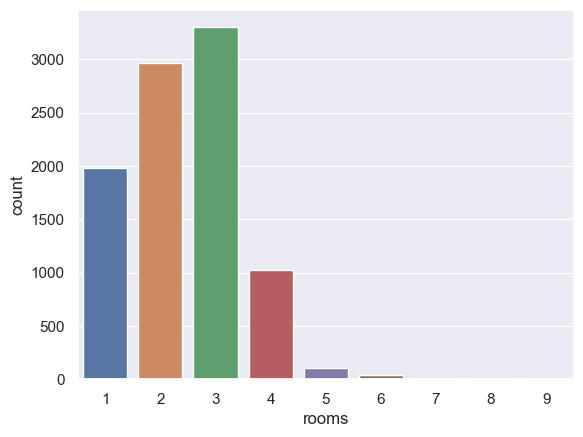

In [235]:
sns.countplot(x=df["rooms"])

## Storeys                         

In [236]:
df["storeys"].unique()

array([25., 10.,  5., 14., 18., 20., 15., 26., 16., 17.,  9., 12., 19.,
        2., 21., 22., 24., 13.,  4.,  6., 23.,  3.,  7.,  8., 11., nan,
       32.,  1., 27., 30., 37.,  0., 29., 33.])

In [237]:
df["storeys"] = df["storeys"].fillna(value=1)

## Storey

In [238]:
df["storey"].unique()

array([ 3., 25., 22.,  5.,  2., 10., 15., 16.,  4.,  7., 13., 11.,  9.,
        8., 19., 23.,  1.,  6., 18., 17., 21., 12., 20., 14., 24., nan,
       28., 27., 32., 30.])

In [239]:
df["storey"] = df["storey"].fillna(value=1)

## Toilet

In [240]:
df["toilet"].unique()

array(['Раздельный', 'Совмещенный', '2 и более', nan, '3 сан.узла',
       '4 сан.узла'], dtype=object)

In [241]:
df["toilet"].value_counts()

Раздельный     4546
Совмещенный    3295
2 и более      1042
3 сан.узла       95
4 сан.узла       17
Name: toilet, dtype: int64

In [242]:
def process_toilet_feature(x):
    if x in ["Раздельный", "Совмещенный", "2 и более"]:
        return x
    elif x in ["3 сан. узла", "4 сан. узла"]:
        return "2 и более"

In [243]:
df["toilet"] = (
    df["toilet"]
    .apply(process_toilet_feature)
    .fillna(df["toilet"].mode()[0])
)

## Balcony type                    

In [244]:
df["balcony_type"].unique()

array(['лоджия застекленная', '2 лоджии застекленные', 'Лоджия',
       'балкон застекленный', '2 лоджии', 'балкон', 'Нет',
       '2 балкона 1 застекленный', '2 балкона застекленные',
       'балкон и лоджия', 'лоджия из кухни застеклена', 'терраса',
       '2 лоджии 1 застекленная', 'балкон застекленный + вагонка',
       '2 балкона застекленные + вагонка', '2 балкона', 'балкон+терраса',
       nan, 'лоджия из кухни застеклена + вагонка',
       '3 лоджии застекленные', 'лоджия застекленная + вагонка',
       '3 лоджии', '3 балкона застекленных', '3 балкона',
       'лоджия из кухни', '2 лоджии застекленные + вагонка', 'веранда'],
      dtype=object)

In [245]:
df["balcony_type"].value_counts()

лоджия застекленная                     4387
балкон застекленный                      864
Лоджия                                   780
Нет                                      750
2 лоджии застекленные                    703
балкон                                   678
2 лоджии                                 212
лоджия из кухни застеклена               166
балкон и лоджия                          150
2 балкона                                110
2 балкона застекленные                   108
терраса                                   96
лоджия застекленная + вагонка             64
балкон+терраса                            53
3 лоджии застекленные                     41
3 лоджии                                  31
балкон застекленный + вагонка             27
2 лоджии 1 застекленная                   27
2 лоджии застекленные + вагонка           19
лоджия из кухни                           16
3 балкона                                 15
2 балкона 1 застекленный                  13
2 балкона 

In [246]:
def map_balcony(x):
    loggias = ["лоджия застекленная", "лоджия", "лоджия из кухни застеклена",
           "лоджия из кухни", "лоджия из кухни застеклена + вагонка", "балкон и лоджия"]
    balconies = ["балкон застекленный", "балкон", "балкон застекленный + вагонка"]
    two_balconies = ["2 лоджии застекленные", "2 лоджии", "2 балкона", "2 балкона застекленные", 
                     "балкон+терраса", "3 лоджии застекленные", "балкон+терраса", 
                     "2 лоджии застекленные + вагонка", "3 лоджии", "3 балкона", "2 балкона застекленные + вагонка",
                     "2 лоджии 1 застекленная", "3 балкона застекленных", "2 балкона 1 застекленный"]

    if x == 'Нет':
        return 'Нет'
    elif x in loggias:
        return 'Лоджия'
    elif x in balconies:
        return 'Балкон'
    elif x in two_balconies:
        return 'Два балкона'
    else:
        return np.nan

In [247]:
df["balcony_type"] = (
    df["balcony_type"]
    .apply(map_balcony)
    .fillna(df["balcony_type"].mode()[0])
)

## House type                      

In [248]:
df["house_type"].unique()

array(['Каркасно-блочный', 'Кирпичный', 'Панельный', 'Монолитный',
       'Силикатные блоки', 'Блок-комнаты', 'Бревенчатый', nan],
      dtype=object)

In [249]:
df["house_type"].value_counts()

Каркасно-блочный    4001
Панельный           2634
Кирпичный           1679
Монолитный           672
Блок-комнаты         206
Силикатные блоки     201
Бревенчатый           20
Name: house_type, dtype: int64

In [250]:
df["house_type"] = df["house_type"].fillna(df["house_type"].mode()[0]) 

## Floor type

In [251]:
df["floor_type"].unique()

array([nan, 'ламинированные', 'паркет', 'бетонная стяжка', 'линолеум',
       'ДСП', 'плитка', 'деревянные', 'ковровое покрытие'], dtype=object)

In [252]:
df["floor_type"].value_counts()

ламинированные       2714
бетонная стяжка      1835
паркет               1043
линолеум              913
деревянные            468
плитка                161
ДСП                    80
ковровое покрытие      18
Name: floor_type, dtype: int64

In [253]:
df["floor_type"] = df["floor_type"].fillna(df["floor_type"].mode()[0])

## Nearest metro station distance  

In [254]:
df["nearest_metro_station_distance"]

1          NaN
2        500.0
4        700.0
5          NaN
7        250.0
         ...  
21360    650.0
21368    950.0
21371      NaN
21376    250.0
21379    550.0
Name: nearest_metro_station_distance, Length: 9422, dtype: float64

In [255]:
df["nearest_metro_station_distance"] = df["nearest_metro_station_distance"].fillna(0)

## Ceiling height                  

In [256]:
df["ceiling_height"]

1        2.75
2        3.03
4        2.75
5        2.70
7         NaN
         ... 
21360    2.70
21368    2.74
21371    2.70
21376    2.90
21379    2.50
Name: ceiling_height, Length: 9422, dtype: float64

In [257]:
df["ceiling_height"] = df["ceiling_height"].fillna(df["ceiling_height"].mode()[0])

<AxesSubplot: xlabel='ceiling_height', ylabel='Count'>

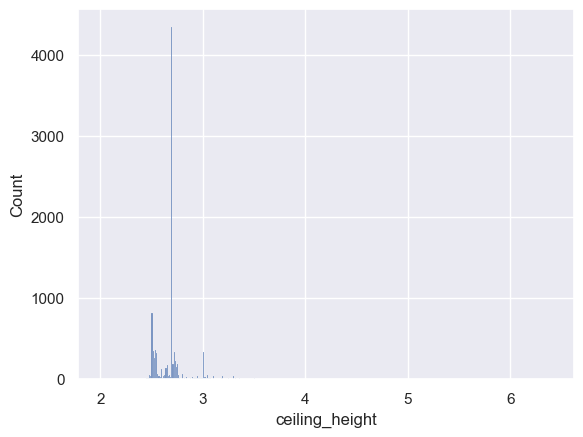

In [258]:
sns.histplot(data=df, x="ceiling_height")

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9422 entries, 1 to 21379
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           9422 non-null   float64
 1   town_district_name              9422 non-null   object 
 2   building_year                   9422 non-null   float64
 3   area_total                      9422 non-null   float64
 4   area_living                     9373 non-null   float64
 5   area_kitchen                    6823 non-null   float64
 6   rooms                           9422 non-null   int64  
 7   storeys                         9422 non-null   float64
 8   storey                          9422 non-null   float64
 9   toilet                          9422 non-null   object 
 10  balcony_type                    9422 non-null   object 
 11  house_type                      9422 non-null   object 
 12  floor_type                      9

In [260]:
df[["price", 
"town_district_name", 
"building_year", "area_total", 
"rooms","storeys", "storey",
"toilet", "balcony_type",
"house_type", "floor_type",
"nearest_metro_station_distance",
"ceiling_height"]].to_csv("../data/2022_12_23/cleaned_data.csv", index=False)